In [1]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

sns.set(style="whitegrid")


In [4]:
df=pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']  # Rename columns

df = df[['Topic', 'Sentiment', 'Tweet']]  # Keep relevant columns
df['Sentiment'] = df['Sentiment'].str.capitalize()
df.dropna(inplace=True)

df.head()


,Topic,Sentiment,Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


/tmp/ipython-input-9-2304406934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


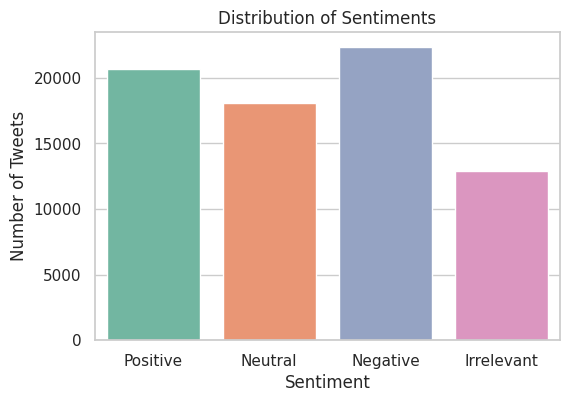

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


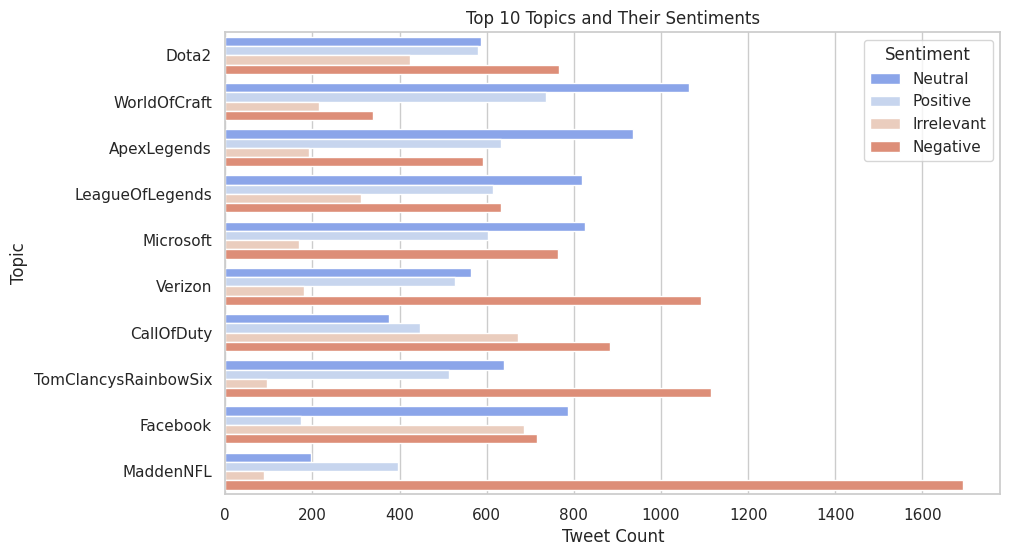

In [10]:
top_topics = df['Topic'].value_counts().nlargest(10).index

plt.figure(figsize=(10,6))
sns.countplot(data=df[df['Topic'].isin(top_topics)], y='Topic', hue='Sentiment', palette='coolwarm')
plt.title("Top 10 Topics and Their Sentiments")
plt.xlabel("Tweet Count")
plt.ylabel("Topic")
plt.show()


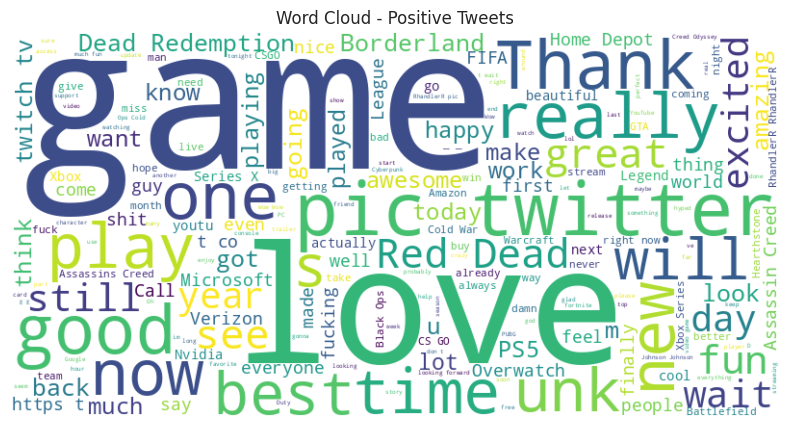

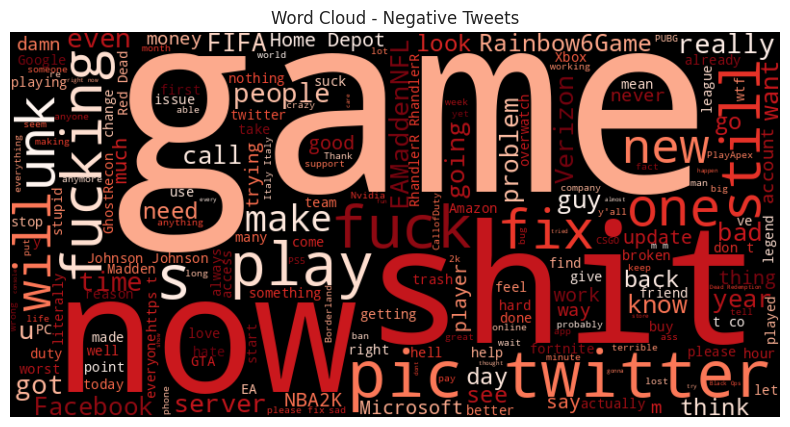

In [11]:
stopwords = set(STOPWORDS)

# Positive Word Cloud
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Tweet'])
wordcloud_pos = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Tweets")
plt.show()

# Negative Word Cloud
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Tweet'])
wordcloud_neg = WordCloud(stopwords=stopwords, background_color="black", colormap='Reds', width=800, height=400).generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Tweets")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-12-641104607.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


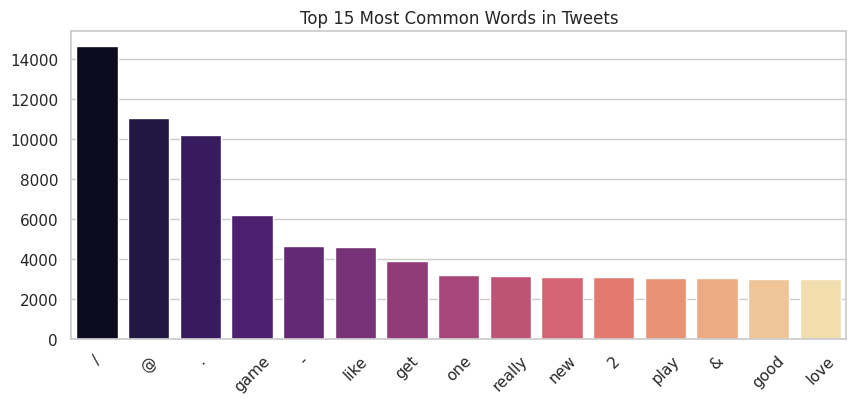

In [12]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

all_words = " ".join(df['Tweet']).lower().split()
filtered_words = [word for word in all_words if word not in stopwords.words('english')]
top_words = Counter(filtered_words).most_common(15)

words, counts = zip(*top_words)
plt.figure(figsize=(10,4))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title("Top 15 Most Common Words in Tweets")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-13-996425236.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set1')


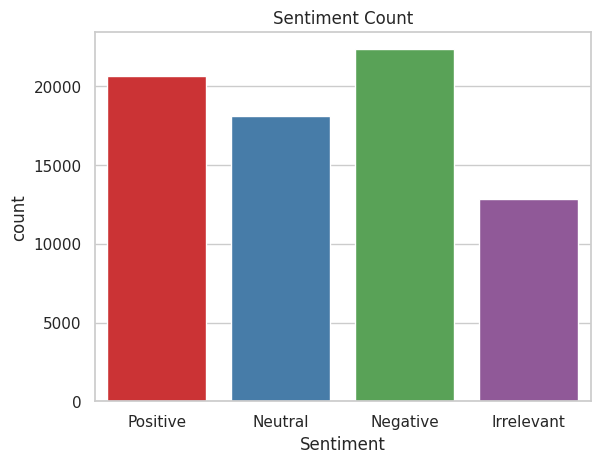

In [13]:
sns.countplot(data=df, x='Sentiment', palette='Set1')
plt.title("Sentiment Count")
plt.show()


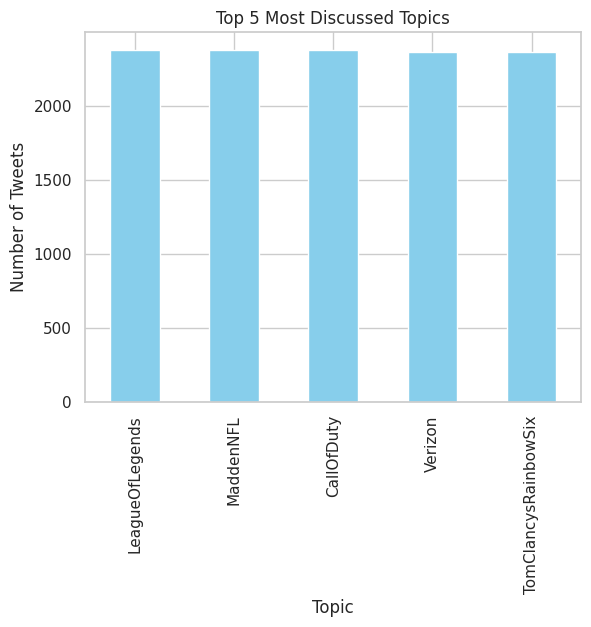

In [14]:
top_topics = df['Topic'].value_counts().nlargest(5)
top_topics.plot(kind='bar', color='skyblue')
plt.title("Top 5 Most Discussed Topics")
plt.xlabel("Topic")
plt.ylabel("Number of Tweets")
plt.show()


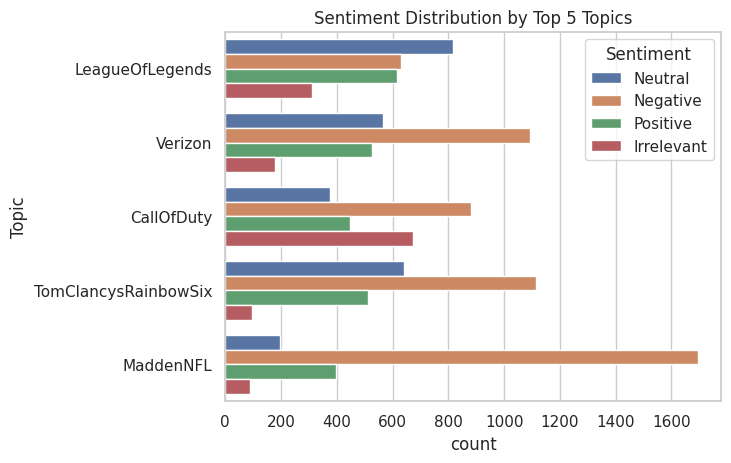

In [15]:
sns.countplot(data=df[df['Topic'].isin(top_topics.index)], y='Topic', hue='Sentiment')
plt.title("Sentiment Distribution by Top 5 Topics")
plt.show()
